In [2]:
import numpy as np 
import random
import pandas as pd
import os
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from os import listdir
from os.path import isfile, join
import numpy
import cv2

import cv2
import shutil
from glob import glob
import matplotlib.pyplot as plt
import math
%matplotlib inline
print(tf.__version__)

2.2.0


In [10]:
covid_path = os.path.join('C:/Users/kzhan/Desktop/dataset/covid')
normal_path = os.path.join('C:/Users/kzhan/Desktop/dataset/normal')

covid_images = glob(os.path.join(covid_path, "*.jpeg"))
normal_images = glob(os.path.join(normal_path, "*.jpeg"))
normal_images.extend(glob(os.path.join(normal_path, "*.jpeg")))

covid = {'class': 'covid',
        'path': covid_path,
        'images': covid_images}

normal = {'class': 'normal',
         'path': normal_path,
         'images': normal_images}

covid_images_length = len(covid_images)
normal_images_length = len(normal_images)
print("Total COVID-19 Images: {}".format(covid_images_length))
print("Total Normal Images: {}".format(normal_images_length))

Total COVID-19 Images: 36
Total Normal Images: 56


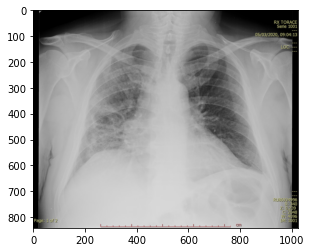

In [11]:
sample_covid_image = cv2.imread(os.path.join(covid_images[0]))
plt.imshow(sample_covid_image)

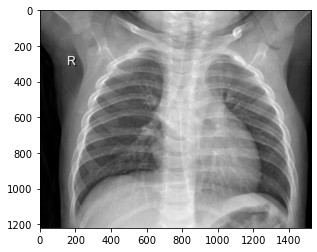

In [12]:
sample_normal_image = cv2.imread(os.path.join(normal_images[0]))
plt.imshow(sample_normal_image)

In [13]:
train_dir = os.path.join('C:/Users/kzhan/Desktop/dataset/train')
test_dir = os.path.join('C:/Users/kzhan/Desktop/dataset/test')

In [35]:
batch_size = 64
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [36]:
covid_train = len(os.listdir('C:/Users/kzhan/Desktop/dataset/train/covid'))
normal_train = len(os.listdir('C:/Users/kzhan/Desktop/dataset/train/normal'))

covid_test = len(os.listdir('C:/Users/kzhan/Desktop/dataset/test/covid'))
normal_test = len(os.listdir('C:/Users/kzhan/Desktop/dataset/test/normal'))

train_image_generator = ImageDataGenerator(rescale = 1./255)
test_image_generator = ImageDataGenerator(rescale = 1./255)

In [37]:
total_train = covid_train + normal_train
total_test = covid_test + normal_test

In [38]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 98 images belonging to 2 classes.


In [39]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 98 images belonging to 2 classes.


In [40]:
model = Sequential()
model.add(Conv2D(32, 3, padding = 'same', activation = 'relu', input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, 4, padding = 'same', activation = 'softmax'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1))

In [41]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 75, 75, 64)        32832     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 20736)            

In [42]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
             metrics = ['accuracy'])

In [43]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=test_data_gen ,
    validation_steps=total_test // batch_size
)

Epoch 1/15
1/1 [==============================] - 2s 2s/step - loss: 0.6890 - accuracy: 0.7031 - val_loss: 0.6605 - val_accuracy: 0.6875
Epoch 2/15
1/1 [==============================] - 2s 2s/step - loss: 0.5921 - accuracy: 0.7353 - val_loss: 0.5802 - val_accuracy: 0.7344
Epoch 3/15
1/1 [==============================] - 2s 2s/step - loss: 0.6244 - accuracy: 0.6875 - val_loss: 0.6376 - val_accuracy: 0.7031
Epoch 4/15
1/1 [==============================] - 2s 2s/step - loss: 0.6164 - accuracy: 0.7647 - val_loss: 0.5820 - val_accuracy: 0.7344
Epoch 5/15
1/1 [==============================] - 2s 2s/step - loss: 0.5686 - accuracy: 0.7500 - val_loss: 0.5781 - val_accuracy: 0.7500
Epoch 6/15
1/1 [==============================] - 2s 2s/step - loss: 0.7381 - accuracy: 0.6471 - val_loss: 0.6001 - val_accuracy: 0.7188
Epoch 7/15
1/1 [==============================] - 2s 2s/step - loss: 0.5814 - accuracy: 0.7344 - val_loss: 0.6202 - val_accuracy: 0.6875
Epoch 8/15
1/1 [=========================

In [44]:
from keras.models import model_from_json
model_json = model.to_json()
with open("model3.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model3.h5")
print("Saved model to disk")

json_file = open('model3.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("model3.h5")
print("Loaded model from disk")

Saved model to disk
Loaded model from disk
